#  Bharat Intern 


### Name: Sham johari 

## Task 1
## Forecasting the sales of a supermarket :
 A supermarket has various departments, and it must
stock up items that will be in demand in
each of these departments. However, while
stocking up, it must make sure that it does
not have excessive stock.

In [86]:
# important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
# read dataset
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **feature engineering**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [89]:
# handling missing values
df.isnull().sum()*100/len(df)

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

In [90]:
df['Postal Code'] = df['Postal Code'].fillna(0)

# Forecasting sales Analysis

## **how many segment for sales is available**

In [91]:
seg_data = pd.DataFrame(df['Segment'].value_counts())

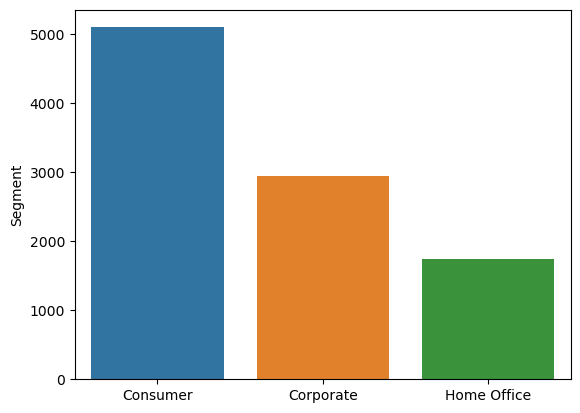

In [92]:

sns.barplot(x=seg_data.index, y='Segment', data=seg_data)
plt.show()

### * from above statistics we say highest sales is in the consumer segment * 

# **top 10 state of USA give max sales count**

In [93]:
state_sale = pd.DataFrame(df['State'].value_counts())[0:10]

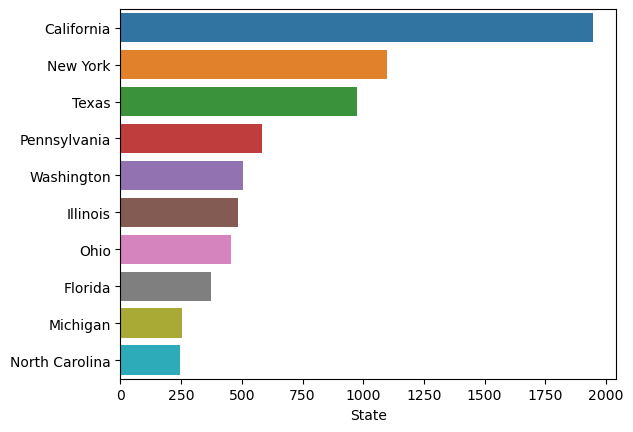

In [94]:
sns.barplot(x='State', y=state_sale.index, data=state_sale)
plt.show()

### * from above statistics we say highest sales is in the california State * 

# **top 10 city of usa that gives maximum sales count**

In [95]:
city_sale = pd.DataFrame(df['City'].value_counts())[0:10]

<AxesSubplot:xlabel='City'>

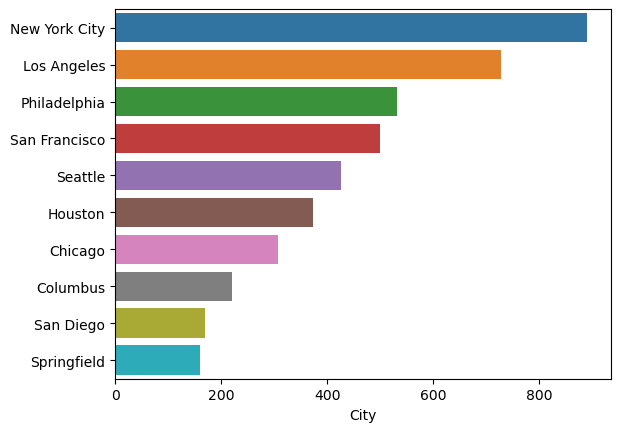

In [96]:
sns.barplot(data=city_sale , y = city_sale.index , x = 'City')

### * from above statistics we say highest sales is in the new york city * 

# **which region of USA gives maximum sales count**

In [97]:
region_data = pd.DataFrame(df['Region'].value_counts())

<AxesSubplot:xlabel='Region'>

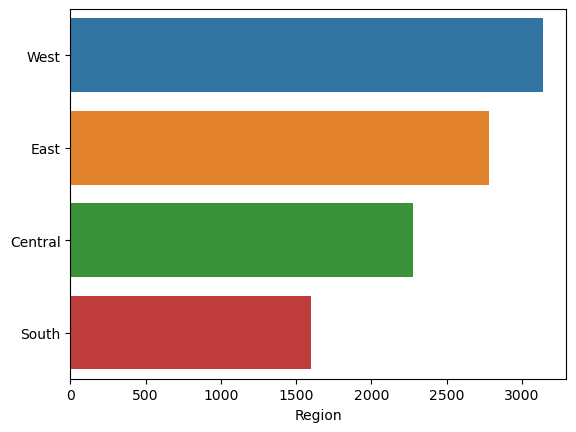

In [98]:
sns.barplot(data=region_data , y = region_data.index , x = 'Region')

### *from above statistics we say highest sales is in the west region of USA * 

# **what kind of product they Are selling and their quantity through USA**

In [99]:
cat_data = pd.DataFrame(df['Category'].value_counts())[0:10]

<AxesSubplot:xlabel='Category'>

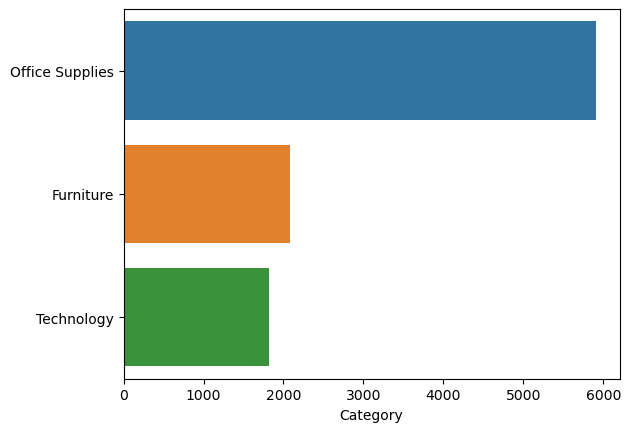

In [100]:
sns.barplot(data=cat_data , y = cat_data.index , x = 'Category')

### * from above statistics we say highest sales is in the office supplies Category * 

# **under office supplies what kind of product they are selling**

In [101]:
os_data = df[df['Category'] == 'Office Supplies']

In [102]:
os_data = pd.DataFrame(os_data['Sub-Category'].value_counts())

<AxesSubplot:xlabel='Sub-Category'>

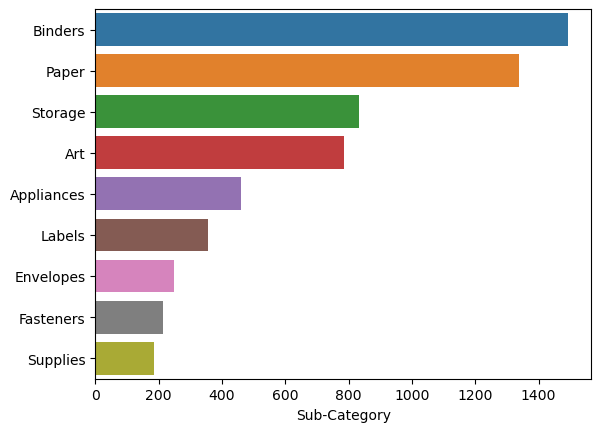

In [103]:
sns.barplot(data=os_data, y = os_data.index , x = 'Sub-Category')

### * from above statistics we say under office supplies Bindes kind of product are high  selling * 

# **under Furniture what kind of product they are selling**

In [104]:
fr_data = df[df['Category'] == 'Furniture']

In [105]:
fr_data = pd.DataFrame(fr_data['Sub-Category'].value_counts())

<AxesSubplot:xlabel='Sub-Category'>

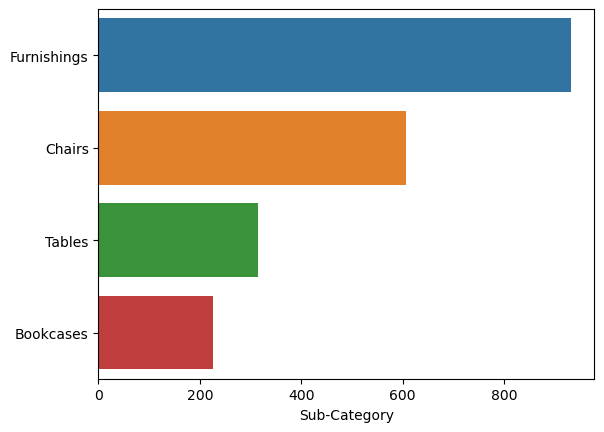

In [106]:
sns.barplot(data=fr_data, y = fr_data.index , x = 'Sub-Category')

### under Furniture furnishings kind of product are highly selling

# **under Technology what kind of product they are selling**

In [107]:
tc_data = df[df['Category'] == 'Technology']

In [108]:
tc_data = pd.DataFrame(tc_data['Sub-Category'].value_counts())

<AxesSubplot:xlabel='Sub-Category'>

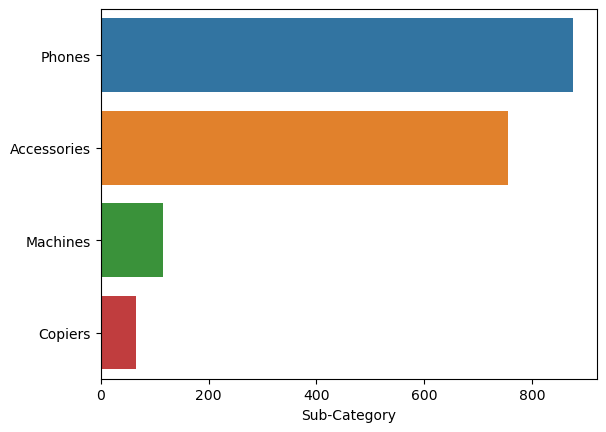

In [109]:
sns.barplot(data=tc_data, y = tc_data.index , x = 'Sub-Category')

### under Technology Phone kind of product are high selling

# **what is the companies preffrred mode of shipping**

In [110]:
sm_data = pd.DataFrame(df['Ship Mode'].value_counts())

<AxesSubplot:xlabel='Ship Mode'>

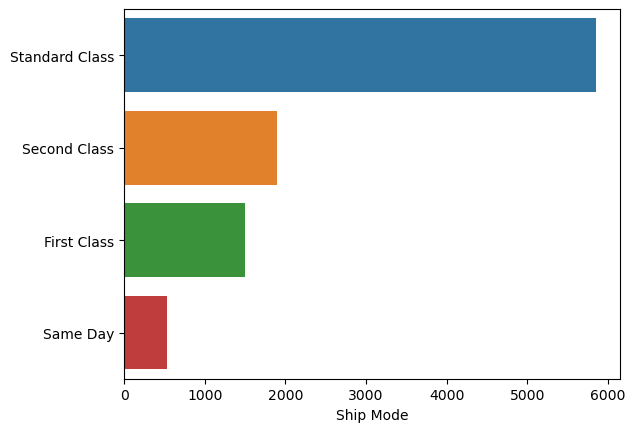

In [111]:
sns.barplot(data=sm_data , y = sm_data.index , x = 'Ship Mode')

# **what is the average shipping cost per ship mode**

In [112]:
sms_data = pd.DataFrame(df.groupby('Ship Mode')['Sales'].mean())

In [113]:
sms_data

,Sales
Ship Mode,
First Class,230.228020
Same Day,232.749143
Second Class,236.547939
Standard Class,228.849856


In [114]:
sms_data = sms_data.sort_values(by = 'Sales')

<AxesSubplot:xlabel='Sales', ylabel='Ship Mode'>

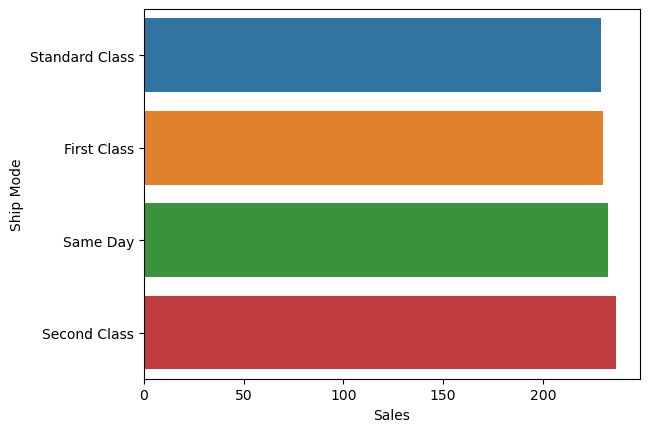

In [115]:
sns.barplot(data=sms_data , y = sms_data.index , x = 'Sales')

# **converting the object dtype into datetime object**

In [116]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/06/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/06/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/04/2018' in DD/MM/YYYY format. Provide format or specif

In [117]:
df['Year'] = pd.DatetimeIndex(df['Ship Date']).year

In [118]:
# df.head()

In [119]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\91883\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

In [120]:
df['Order_Year'] = pd.DatetimeIndex(df['Order Date']).year

In [121]:
#df.head()

# **avg sales for consecutive year**

In [122]:
year_sale = pd.DataFrame(df.groupby('Year')['Sales'].mean())

<AxesSubplot:xlabel='Year', ylabel='Sales'>

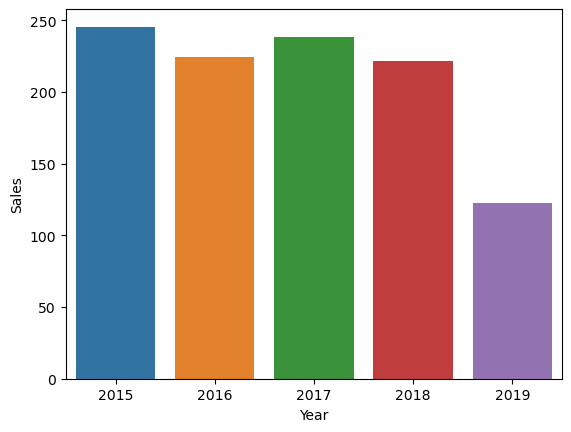

In [123]:
sns.barplot(data=year_sale , x = year_sale.index , y = 'Sales')

# **no. of shipping in a consecutive year**

In [124]:
ship_year = pd.DataFrame(df['Year'].value_counts())

In [125]:
ship_year = ship_year.reset_index()
ship_year

,index,Year
0,2018,3249
1,2017,2524
2,2016,2083
3,2015,1902
4,2019,42


# **no. of order in a consecutive year**

In [126]:
order_year = pd.DataFrame(df['Order_Year'].value_counts())

In [127]:
order_year = order_year.reset_index()
order_year

,index,Order_Year
0,2018,3258
1,2017,2534
2,2016,2055
3,2015,1953


# **how much order they failed to ship**

In [128]:
order_ship = pd.merge(order_year , ship_year)

In [129]:
order_ship.set_index(keys = 'index')

,Order_Year,Year
index,,
2018,3258,3249
2017,2534,2524
2016,2055,2083
2015,1953,1902


In [130]:
order_ship['Failed_to_ship'] = order_ship['Order_Year']-order_ship['Year']

In [131]:
order_ship

,index,Order_Year,Year,Failed_to_ship
0,2018,3258,3249,9
1,2017,2534,2524,10
2,2016,2055,2083,-28
3,2015,1953,1902,51


**insight:- they have failed to ship maximum at 2015 and they have cleared 28 pending order at 2016**

# **top 10 highest buyer in their 4 years journey**

In [132]:
high_buyer = pd.DataFrame(df['Customer Name'].value_counts())[0:10]

<AxesSubplot:xlabel='Customer Name'>

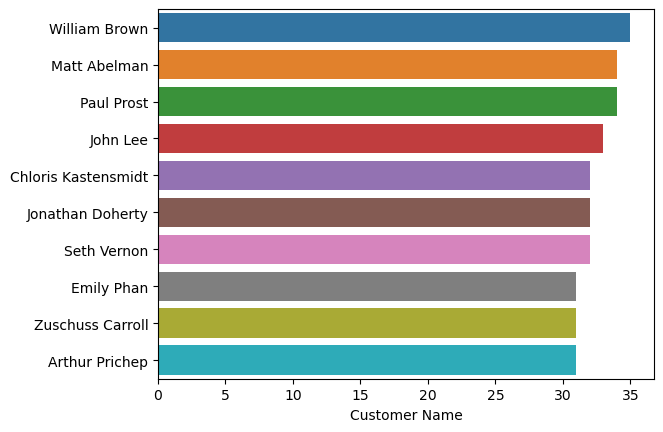

In [133]:
sns.barplot(data=high_buyer , y = high_buyer.index , x = 'Customer Name')

# **top 10  city, state and region gives maximum sales**

In [134]:
max_city_sales1 = pd.DataFrame(df.groupby('City')['Sales'].mean().sort_values(ascending = False))[0:10]

In [135]:
max_city_sales1


,Sales
City,
Jamestown,2354.395000
Cheyenne,1603.136000
Bellingham,1263.413333
Independence,1208.685000
Burbank,1082.386000
Buffalo,906.349600
Burlington,866.723280
Beverly,861.063333
Lafayette,860.147586


In [136]:
max_state_sales = pd.DataFrame(df.groupby('State')['Sales'].mean().sort_values(ascending = False))[0:10]

In [137]:
max_state_sales

,Sales
State,
Wyoming,1603.136000
Vermont,811.760909
Nevada,428.951333
Rhode Island,409.545927
Montana,372.623467
Indiana,360.877037
Missouri,336.441667
Minnesota,335.541011
Alabama,319.846557


In [138]:
max_zone_sales = pd.DataFrame(df.groupby('Region')['Sales'].mean().sort_values(ascending = False))

In [139]:
max_zone_sales

,Sales
Region,
South,243.524067
East,240.401697
West,226.184613
Central,216.357889



### INSIGHTS
Key Market - California State: California State stands out as the top revenue-generating region for the supermarket. Its high sales indicate its significance as a crucial market.

Potential in the West Region: Among all regions, the West region, where California is located, exhibits the highest sales. This highlights the tremendous potential this region holds for the supermarket.

Thriving Consumer Segment: The consumer segment emerges as the category with the highest sales. This underscores the importance of catering to the needs and demands of individual consumers.

Success in New York City: New York City stands out as the top-performing city, displaying the highest sales. Recognizing and targeting the unique preferences of this market could drive further success.

Office Supplies Category Dominance: The office supplies category proves to be the most lucrative. Ensuring ample stock of these products is vital to capitalize on this high-demand segment.

Binders - A Top-Selling Product: Within the office supplies category, Binders emerge as the best-selling product. Focusing on the supply and promotion of Binders can maximize sales in this category.

By incorporating these insights into the supermarket's stocking and marketing strategies, it can optimize sales while efficiently managing inventory to avoid excessive stock.

### Thank you ...